<a href="https://colab.research.google.com/github/junuimoon/DeeplearningfromScratch/blob/master/Chapter4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.3.1 미분법

In [0]:
#나쁜 구현 예

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def numerical_diff(f, x):
    h = 1e-4               #10e-4정도가 괜찮다.
    return (f(x+h) - f(x-h)) / (2*h)

In [0]:
def function_1(x):
    return 0.01*x**2 + 0.1*x
    

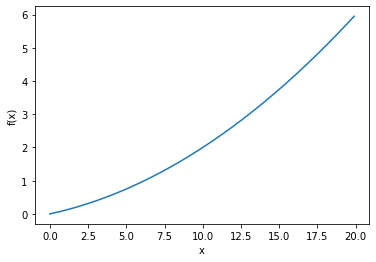

In [7]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [10]:
numerical_diff(function_1, 5)

0.200000000000089

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0) 

6.00000000000378

In [16]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

4.4 기울기

모든 변수의 편미분을 벡터로 해서 정리한 것을 그래디언트(기울기)라고 한다.
 

In [0]:
def numerical_fradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)   # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산하는 과정
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / 2*h
        x[idx] = tmp_val

    return grad

np.zeros.like(x) -- 형상이 같고, 원소가 모두 0인 배열을 만들 때 사용하는 함수

In [24]:
numerical_fradient(function_2, np.array([3.0, 4.0]))

array([6.e-08, 8.e-08])

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_fradient(f,x)
        x -=lr * grad
    return x




문제 = f(x0, x1) = x^2 + x1^2 의 최솟값을 구하시오

In [0]:
init_x = np.array([-3.0, 4.0])

In [34]:
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-2.9999982,  3.9999976])

4.5 학습 알고리즘 구현하기

In [35]:
1. 미니배치
2. 기울기 산출
3. 매개변수 갱신
4. 무한반복

SyntaxError: ignored

In [37]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self_predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical.gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical.gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical.gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical.gradient(loss_W, self.params['b2'])

ModuleNotFoundError: ignored